In [ ]:
!wget "https://github.com/sagihaider/CE888_2021/blob/main/Lab_8/data.zip?raw=true"

--2021-05-05 05:40:28--  https://github.com/sagihaider/CE888_2021/blob/main/Lab_8/data.zip?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/sagihaider/CE888_2021/raw/main/Lab_8/data.zip [following]
--2021-05-05 05:40:28--  https://github.com/sagihaider/CE888_2021/raw/main/Lab_8/data.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_8/data.zip [following]
--2021-05-05 05:40:28--  https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_8/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting 

In [ ]:
from zipfile import ZipFile
file_name = "data.zip?raw=true"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
import os
base_dir = '/content/labels'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

human = '/content/data/Humans'
cats = '/content/data/cats'
dogs = '/content/data/dogs'
horses = '/content/data/horses'

In [ ]:
import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range(1,160)]
for fname in fnames:
  src = os.path.join(cats, fname)
  dst = os.path.join(train_dir, fname)
  #print(src,dst)
  shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(160, 181)]
for fname in fnames:
  src = os.path.join(cats, fname)
  dst = os.path.join(validation_dir, fname)
  shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(181, 202)]
for fname in fnames:
  src = os.path.join(cats, fname)
  dst = os.path.join(test_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1,160)]
for fname in fnames:
  src = os.path.join(dogs, fname)
  dst = os.path.join(train_dir, fname)
  #print(src,dst)
  shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(160, 181)]
for fname in fnames:
  src = os.path.join(dogs, fname)
  dst = os.path.join(validation_dir, fname)
  shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(181, 202)]
for fname in fnames:
  src = os.path.join(dogs, fname)
  dst = os.path.join(test_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(1,160)]
for fname in fnames:
  src = os.path.join(human, fname)
  dst = os.path.join(train_dir, fname)
  #print(src,dst)
  shutil.copyfile(src, dst)
    
fnames = ['rider-{}.jpg'.format(i) for i in range(160, 181)]
for fname in fnames:
  src = os.path.join(human, fname)
  dst = os.path.join(validation_dir, fname)
  shutil.copyfile(src, dst)
    
fnames = ['rider-{}.jpg'.format(i) for i in range(181, 202)]
for fname in fnames:
  src = os.path.join(human, fname)
  dst = os.path.join(test_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(1,160)]
for fname in fnames:
  src = os.path.join(horses, fname)
  dst = os.path.join(train_dir, fname)
  #print(src,dst)
  shutil.copyfile(src, dst)
    
fnames = ['horse-{}.jpg'.format(i) for i in range(160, 181)]
for fname in fnames:
  src = os.path.join(horses, fname)
  dst = os.path.join(validation_dir, fname)
  shutil.copyfile(src, dst)
    
fnames = ['horse-{}.jpg'.format(i) for i in range(181, 202)]
for fname in fnames:
  src = os.path.join(horses, fname)
  dst = os.path.join(test_dir, fname)
  shutil.copyfile(src, dst)

In [ ]:
import cv2
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4

In [ ]:
def label_img(img):
    word_label = img.split('.')[0]
    word_label = word_label.split('-')[0]
    if word_label == 'dog': return 1
    elif word_label == 'horse': return 2
    elif word_label == 'rider': return 3
    elif word_label == 'cat': return 0

In [ ]:
import cv2
def createDataSplitSet(datapath):
    X=[]
    y=[]
    for img in os.listdir(datapath):
        label = label_img(img)
        # print(label)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)
    return np.array(X), np.array(y)

In [ ]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)
print(train_X.shape)
print(val_X.shape)
print(test_X.shape)

(636, 224, 224, 3)
(84, 224, 224, 3)
(84, 224, 224, 3)


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras import Model

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [ ]:
model = VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
model.summary()

553467904/553467096 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [ ]:
last_layer = model.get_layer('block5_conv3').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='1')(x)
x = Dense(64, activation='relu', name='2')(x)
out = Dense(4, activation='softmax', name='output')(x)  ## 2 classes
model = Model(img_input, out)

for layer in model.layers[:-3]:
	layer.trainable = False

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

In [ ]:
history = model.fit(train_X, train_y,
                              batch_size=20,
                              epochs=20, 
                              validation_data=(val_X, val_y),
                              callbacks=my_callbacks)

Epoch 1/20
32/32 [==============================] - 45s 266ms/step - loss: 2.4224 - acc: 0.5117 - val_loss: 0.4008 - val_acc: 0.8333
Epoch 2/20
32/32 [==============================] - 4s 115ms/step - loss: 0.1058 - acc: 0.9585 - val_loss: 0.3252 - val_acc: 0.8214
Epoch 3/20
32/32 [==============================] - 4s 115ms/step - loss: 0.0132 - acc: 0.9974 - val_loss: 0.3512 - val_acc: 0.8452
Epoch 4/20
32/32 [==============================] - 4s 115ms/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.3593 - val_acc: 0.8571
Epoch 5/20
32/32 [==============================] - 4s 115ms/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.3192 - val_acc: 0.8929
Epoch 6/20
32/32 [==============================] - 4s 116ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.3445 - val_acc: 0.8452
Epoch 7/20
32/32 [==============================] - 4s 116ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.3456 - val_acc: 0.8452
Epoch 8/20
32/32 [==============================] - 4s 116ms/step - loss: 7

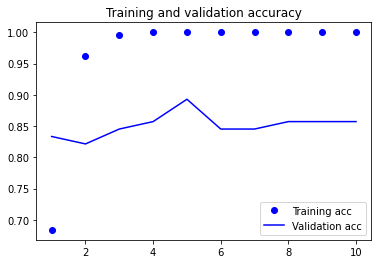

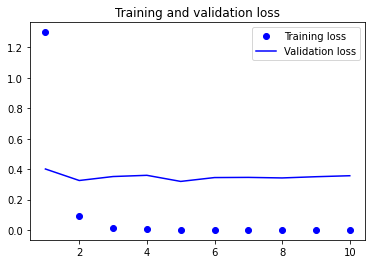

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:

## Test Accuracy
evaluate = model.evaluate(test_X, test_y)
predictions = model.predict(test_X)
print(predictions)
print(test_y)
evaluate


3/3 [==============================] - 7s 116ms/step - loss: 0.2680 - acc: 0.9048
[[2.98958242e-01 6.94124997e-01 7.13049158e-05 6.84546120e-03]
 [5.08593359e-07 4.43318140e-06 9.99994397e-01 7.44624515e-07]
 [5.50072327e-05 3.54745355e-03 3.48814268e-04 9.96048629e-01]
 [1.37766385e-02 3.70374182e-04 9.80082810e-01 5.77026978e-03]
 [7.26611859e-07 8.54634152e-07 2.29543821e-06 9.99996185e-01]
 [7.22117070e-03 7.36685877e-04 9.91299331e-01 7.42810778e-04]
 [9.91248250e-01 1.22587138e-04 2.48300075e-05 8.60439707e-03]
 [1.68842661e-07 5.29091922e-05 1.95643461e-05 9.99927402e-01]
 [1.43231773e-07 6.59031775e-06 9.99966383e-01 2.69639786e-05]
 [2.58070145e-06 7.29833264e-03 9.92692471e-01 6.64989511e-06]
 [9.97624695e-01 1.51673343e-03 3.35365476e-04 5.23111376e-04]
 [1.87134731e-06 1.78131508e-04 9.99589503e-01 2.30417310e-04]
 [2.46784639e-05 1.02262408e-03 6.75225529e-05 9.98885214e-01]
 [1.07656933e-01 4.03985046e-02 1.71768144e-02 8.34767759e-01]
 [9.99961734e-01 3.06231850e-05 3.73

[0.26803842186927795, 0.9047619104385376]